## Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, cv2, glob
from utils.color import cvtColor, ConvertColor
from utils.myplot import plot2
from utils import utils

## Lane Finding Pipeline
### The following steps are part of the pipeline which is defined in the process_image() function:
- Calibrate camera 
- Undistort image 
- Perform perspective transformation to get the bird's-eye view
- Apply color thresholding which outputs an binary image
- Find lines with sliding window and calculate the radius of curvature and vehicle center. 
- Draw polygon and add the desired text to the image 

In [2]:
# Calibrate camera 
mtx, dist = utils.calibrate_camera("camera_cal/calibration*.jpg", nx=9, ny=6)

In [3]:
def process_image(image):
    undist = utils.undistort(image, mtx, dist)
    warped, M, M_inv = utils.warp(undist)
    binary_output = utils.color_thresh(warped)
    ploty, left_line, right_line, left_curv, right_curv, center = utils.fit_lines(binary_output)
    img = utils.weighted_img(undist, binary_output, M_inv, ploty, left_line, right_line)
    img = utils.add_text(img, (left_curv+right_curv)/2, center)
    return img

## Test Images 

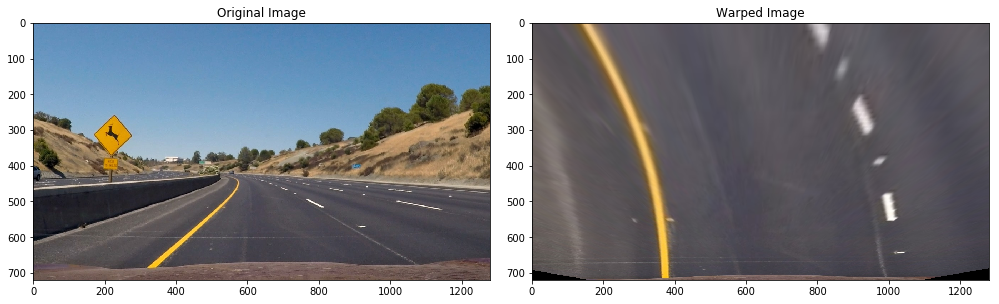

In [4]:
# Read an test image and perform pipeline
test_image = cv2.imread('test_images/test2.jpg')
undist = utils.undistort(test_image, mtx, dist)
warped, M, M_inv = utils.warp(undist)
plot2(cvtColor(test_image, ConvertColor.BGR2RGB), cvtColor(warped, ConvertColor.BGR2RGB), (14,9),'Original Image', 'Warped Image')

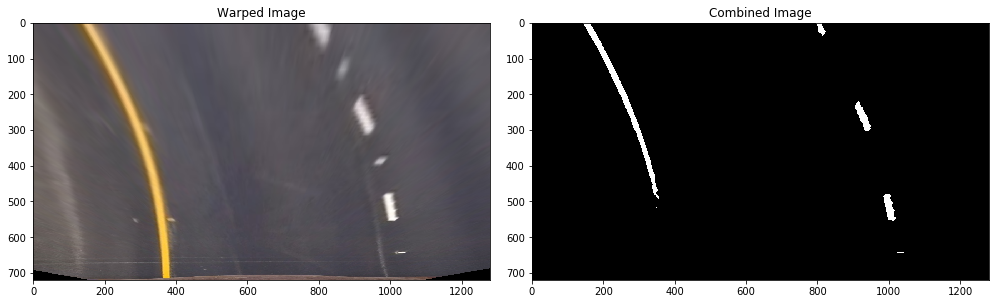

In [5]:
# Perform color thresholding on warped image 
bin_img = utils.color_thresh(warped)
plot2(cvtColor(warped, ConvertColor.BGR2RGB), bin_img, (14, 9), 'Warped Image', 'Combined Image', None, "gray")

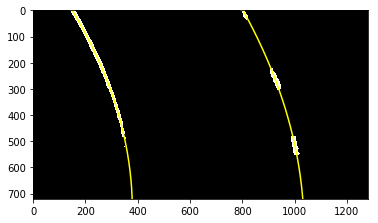

In [6]:
# Find lines and plot it
ploty, left_fitx, right_fitx, left_c, right_c, center = utils.fit_lines(bin_img, True)

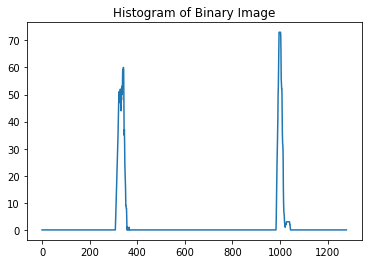

In [7]:
# Calculate Historgram
histogram = np.sum(bin_img[bin_img.shape[0]//2:,:], axis=0)
plt.plot(histogram)
plt.title("Histogram of Binary Image")
plt.show()

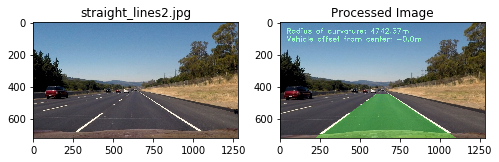

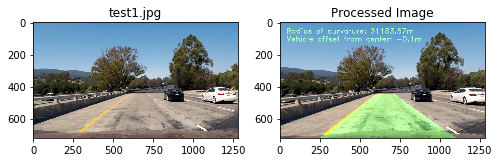

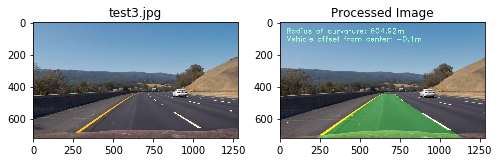

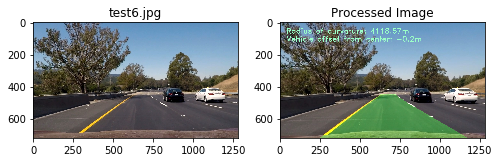

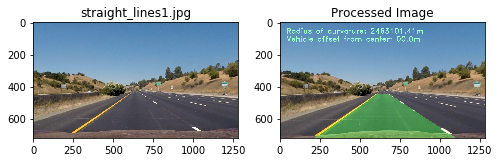

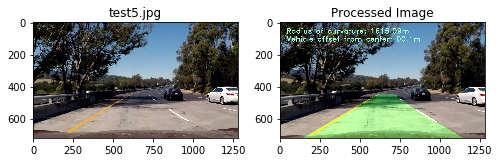

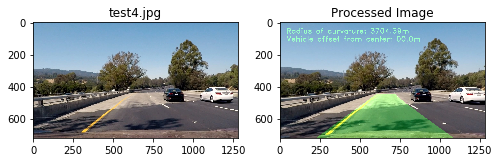

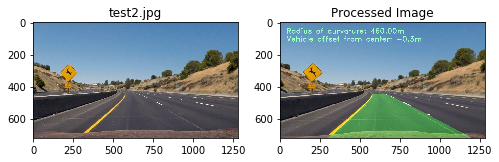

In [8]:
# Read in all test images and perfrom pipeline 
img_path = "test_images/"
for i, filename in enumerate(os.listdir(img_path)):
    img = cv2.imread(os.path.join(img_path, filename))
    proc_img = process_image(img) 
    plot2(cvtColor(img, ConvertColor.BGR2RGB), cvtColor(proc_img, ConvertColor.BGR2RGB), (7,4), filename, 'Processed Image', None, "gray")

## Test on Videos

In [9]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [10]:
video_output = 'advanced_lane_lines_output2.mp4'
#clip1  = VideoFileClip("project_video.mp4").subclip(20,26)
clip1 = VideoFileClip("project_video.mp4")
clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video advanced_lane_lines_output2.mp4
[MoviePy] Writing video advanced_lane_lines_output2.mp4


100%|█████████▉| 1260/1261 [02:05<00:00, 10.00it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: advanced_lane_lines_output2.mp4 

CPU times: user 3min 47s, sys: 4.36 s, total: 3min 51s
Wall time: 2min 7s


In [11]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))